# Python Libraries

In [3]:
import pandas as pd
import os
import numpy as np
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
from collections import defaultdict

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('max_colwidth', -1)

<ipython-input-4-af59b17b2a7e>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


# Importing/Loading of Data

In [266]:
filepath = 
df = pd.read_csv("googleplaystore.csv",encoding='utf-8')
col_name = ['app',  'category', 'rating', 'reviews', 'size', 'installs', 'type', 'price', 'content_rating', 'genres', 'last_updated', 'current_version', 'android_version']
df.columns = col_name
df[1000:1200]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_version,android_version
1000,"Imgur: Find funny GIFs, memes & watch viral videos",ENTERTAINMENT,4.3,160164,12M,"10,000,000+",Free,0,Teen,Entertainment,"August 1, 2018",4.2.0.8447,5.0 and up
1001,Meme Generator,ENTERTAINMENT,4.6,3771,53M,"100,000+",Paid,$2.99,Mature 17+,Entertainment,"August 3, 2018",4.426,4.1 and up
1002,SketchBook - draw and paint,ENTERTAINMENT,4.3,256664,77M,"10,000,000+",Free,0,Everyone,Entertainment,"May 4, 2018",4.1.7,4.0.3 and up
1003,Colorfy: Coloring Book for Adults - Free,ENTERTAINMENT,4.5,787177,Varies with device,"10,000,000+",Free,0,Everyone,Entertainment,"June 20, 2018",Varies with device,Varies with device
1004,All Events in City,EVENTS,4.0,3782,9.5M,"100,000+",Free,0,Everyone,Events,"June 12, 2018",8.4,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Chick-fil-A,FOOD_AND_DRINK,4.3,28008,17M,"5,000,000+",Free,0,Everyone,Food & Drink,"August 3, 2018",6.0.1,5.0 and up
1196,hellofood - Food Delivery,FOOD_AND_DRINK,4.0,43614,25M,"1,000,000+",Free,0,Everyone,Food & Drink,"October 12, 2016",2.14.36,4.0.3 and up
1197,Starbucks,FOOD_AND_DRINK,4.5,455377,35M,"10,000,000+",Free,0,Everyone,Food & Drink,"August 1, 2018",4.11.1,4.4 and up
1198,Easy and quick desserts,FOOD_AND_DRINK,4.6,1398,10M,"100,000+",Free,0,Everyone 10+,Food & Drink,"June 14, 2018",1.0,4.0.3 and up


# # Use case
The use case for this dataset is to understand the users behaviour. For this purpose, we have added two new columns i.e. user_id and download_date.

user_id represent "total number of users" who downloaded different apps.

download_date represent "download date (2020-01-01 to 2021-01-01) of app by user"

Below the data has been cleaned, preprocessed and reordered in order to stream the data. The streamed data is used to create some interesting pipelines.


In [268]:
df["user_id"] = np.random.randint(1, 200, len(df))
df["download_date"] = np.random.choice(pd.date_range('2020-01-01', '2021-01-01'), len(df))
#reindex the column order
df = df.reindex(columns=['download_date', 'user_id', 'app',  'category', 'rating', 'reviews', 'size', 'installs', 'type', 'price', 'content_rating', 'genres', 'last_updated', 'current_version', 'android_version'])
#Sort the Dataframe based on the the download_date
df = df.sort_values('download_date')
#reset the index=row numbers
df = df.reset_index(drop =True)


# App Details

In [248]:
df['app_id'] = df.groupby(['app']).ngroup()
df['app_id'] = df['app_id'].map(lambda q: q+500)

In [249]:
df_app = df['app'].unique()
len(df_app)
# # Assigning ids to values
# d_dict = defaultdict(lambda: len(d_dict))
# list_ids= [d_dict[n] for n in Alist]
# # Print df
# df = df.merge(faker_data, on='user_id', how='left')

9659

# User Details

In [250]:
from faker import Faker
fake = Faker()
n = 300
faker_data = pd.DataFrame([[fake.name(), np.random.randint(18,65), fake.state()] for _ in range(n)],
     columns=['user_name', 'user_age', 'user_location'])
user_id = pd.factorize(faker_data.apply(tuple, axis=1))[0] + 1
faker_data.insert(loc=0, column='user_id', value=user_id)
#faker_data.head(30)

# Data Merge

In [251]:
df = df.merge(faker_data, on='user_id', how='left')
# dftemp = df[df.duplicated(['app'], keep=False)]
df['time_spent_min'] = np.random.randint(90, 400, len(df))
df['user_details'] = df['user_name'] + ', ' + df['user_age'].astype(str) + ', ' + df['user_location'] + ', ' + df['time_spent_min'].astype(str)
df = df.drop(['user_name', 'user_age', 'user_location', 'time_spent_min'], 1)
df

,download_date,user_id,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_version,android_version,app_id,user_details
0,2020-01-01,122,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.5,2923,25M,"100,000+",Paid,$24.99,Everyone,Medical,"May 25, 2018",2018.5.47,5.0 and up,5777,"Courtney Olson, 38, Massachusetts, 288"
1,2020-01-01,182,BW Smart,TOOLS,3.7,50,19M,"5,000+",Free,0,Everyone,Tools,"June 6, 2017",v1.2.2,4.0 and up,1828,"Sheila Morris DVM, 32, Colorado, 305"
2,2020-01-01,154,Easy V-Bux free,FAMILY,4.6,856,2.9M,"5,000+",Free,0,Everyone,Entertainment,"July 17, 2018",1.0,2.1 and up,4364,"Jesse Hurley, 61, Missouri, 187"
3,2020-01-01,80,BH Mission Playbook,TRAVEL_AND_LOCAL,NaN,0,22M,100+,Free,0,Everyone,Travel & Local,"April 2, 2018",1.5.4,4.4 and up,1577,"Jonathan Chan, 57, New York, 170"
4,2020-01-01,142,MegaNDS (NDS Emulator),GAME,3.4,2218,11M,"500,000+",Free,0,Everyone,Arcade,"October 18, 2017",2.0,4.0 and up,6630,"Christopher Hernandez, 19, Kansas, 148"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,2021-01-01,116,Virtual Boyfriend Chat,FAMILY,2.4,407,306k,"50,000+",Free,0,Mature 17+,Entertainment,"April 11, 2017",1.0,2.2 and up,9359,"Angela Howard, 57, Hawaii, 278"
10835,2021-01-01,140,OTOME of Ikemen cafe,FAMILY,4.5,1318,24M,"50,000+",Free,0,Teen,Simulation,"March 5, 2018",1.0.21,4.1 and up,7190,"Jessica Stewart, 42, Minnesota, 236"
10836,2021-01-01,18,あなカレ【BL】無料ゲーム,FAMILY,4.7,6073,8.5M,"100,000+",Free,0,Mature 17+,Simulation,"February 25, 2018",4.2.2,2.3 and up,10144,"Mary Collier, 43, Arkansas, 350"
10837,2021-01-01,171,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,0,Everyone,Board,"August 3, 2018",2.0.4,4.1 and up,521,"Cody Davidson, 41, North Dakota, 128"


# Data Cleanig

In [252]:
(df.duplicated().value_counts()/df.shape[0])*100

False    100.0
dtype: float64

In [253]:
# cleaning of rating data
rating_data=df[pd.notnull(df['rating'])]
median=np.median(rating_data['rating'])
df['rating'].fillna(median,inplace=True)
# In other features missing value % is not considrable so drop nan
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10828 entries, 0 to 10838
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   download_date    10828 non-null  datetime64[ns]
 1   user_id          10828 non-null  int64         
 2   app              10828 non-null  object        
 3   category         10828 non-null  object        
 4   rating           10828 non-null  float64       
 5   reviews          10828 non-null  int64         
 6   size             10828 non-null  object        
 7   installs         10828 non-null  object        
 8   type             10828 non-null  object        
 9   price            10828 non-null  object        
 10  content_rating   10828 non-null  object        
 11  genres           10828 non-null  object        
 12  last_updated     10828 non-null  object        
 13  current_version  10828 non-null  object        
 14  android_version  10828 non-null  objec

# Data Preprocessing

In [254]:
# converting last date
#df[("rating")] = df[("rating")].replace(to_replace= np.nan, value='')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['last_updated']=pd.to_datetime(df['last_updated'])
#df['before_update']=df['last_updated'].max()-df['last_updated']
df['last_updated'] = df['last_updated'].dt.strftime('%Y-%m-%d')
df['last_updated'] = df['last_updated'].astype('datetime64[ns]')

In [255]:
# convert datatype to integer
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')
df['installs'] = df['installs'].str.replace(',','').str.replace('+','').astype('int')
df['size'] = df['size'].str.replace('M','e+6').str.replace('k','e+3').str.replace('Varies with device','0').astype('float')
df['price'] = df['price'].str.replace('$','').astype('float')
#df.info()


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10828 entries, 0 to 10838
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   download_date    10828 non-null  datetime64[ns]
 1   user_id          10828 non-null  int64         
 2   app              10828 non-null  object        
 3   category         10828 non-null  object        
 4   rating           10828 non-null  float64       
 5   reviews          10828 non-null  int64         
 6   size             10828 non-null  float64       
 7   installs         10828 non-null  int64         
 8   type             10828 non-null  object        
 9   price            10828 non-null  float64       
 10  content_rating   10828 non-null  object        
 11  genres           10828 non-null  object        
 12  last_updated     10828 non-null  datetime64[ns]
 13  current_version  10828 non-null  object        
 14  android_version  10828 non-null  objec

In [256]:
#df1 = df[0:5000]
#df2 = df[df.duplicated(['user_id','app_id'], keep=False)]
#df2.to_json (r'Export_DataFrame.json')
# for i in df2.index:
#     # convert the row to json
#     export = df2.loc[i].to_json()
#     # print the returncode
#     print(export)
#df2

In [257]:
# nan_rows = df[df['rating'].isnull()]
# nan_rows

In [258]:
#df1.to_csv('temp_data.csv', index =False)

# Data Visualtization

In [241]:
mask = (df['download_date'] == '2020-01-01')
df = df.loc[mask]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   download_date    25 non-null     datetime64[ns]
 1   user_id          25 non-null     int64         
 2   app              25 non-null     object        
 3   category         25 non-null     object        
 4   rating           25 non-null     float64       
 5   reviews          25 non-null     int64         
 6   size             25 non-null     float64       
 7   installs         25 non-null     int64         
 8   type             25 non-null     object        
 9   price            25 non-null     float64       
 10  content_rating   25 non-null     object        
 11  genres           25 non-null     object        
 12  last_updated     25 non-null     datetime64[ns]
 13  current_version  25 non-null     object        
 14  android_version  25 non-null     object     

In [259]:
daterange = df[df["download_date"].isin(pd.date_range('2020-01-01', '2020-12-01'))]
daterange

,download_date,user_id,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_version,android_version,app_id,user_details
0,2020-01-01,122,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.5,2923,25000000.0,100000,Paid,24.99,Everyone,Medical,2018-05-25,2018.5.47,5.0 and up,5777,"Courtney Olson, 38, Massachusetts, 288"
1,2020-01-01,182,BW Smart,TOOLS,3.7,50,19000000.0,5000,Free,0.00,Everyone,Tools,2017-06-06,v1.2.2,4.0 and up,1828,"Sheila Morris DVM, 32, Colorado, 305"
2,2020-01-01,154,Easy V-Bux free,FAMILY,4.6,856,2900000.0,5000,Free,0.00,Everyone,Entertainment,2018-07-17,1.0,2.1 and up,4364,"Jesse Hurley, 61, Missouri, 187"
3,2020-01-01,80,BH Mission Playbook,TRAVEL_AND_LOCAL,4.3,0,22000000.0,100,Free,0.00,Everyone,Travel & Local,2018-04-02,1.5.4,4.4 and up,1577,"Jonathan Chan, 57, New York, 170"
4,2020-01-01,142,MegaNDS (NDS Emulator),GAME,3.4,2218,11000000.0,500000,Free,0.00,Everyone,Arcade,2017-10-18,2.0,4.0 and up,6630,"Christopher Hernandez, 19, Kansas, 148"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9910,2020-12-01,147,To-Do Calendar Planner,PRODUCTIVITY,4.2,30291,0.0,1000000,Free,0.00,Everyone,Productivity,2018-05-29,Varies with device,Varies with device,8995,"Rebecca Evans, 40, Hawaii, 217"
9911,2020-12-01,190,"HD Video Player (wmv,avi,mp4,flv,av,mpg,mkv)2017",VIDEO_PLAYERS,3.3,171,4800000.0,10000,Free,0.00,Everyone,Video Players & Editors,2017-08-10,1.1,4.1 and up,5552,"Brittany Morales, 20, Rhode Island, 220"
9912,2020-12-01,136,"letgo: Buy & Sell Used Stuff, Cars & Real Estate",SHOPPING,4.5,973270,20000000.0,50000000,Free,0.00,Teen,Shopping,2018-08-06,2.4.9,4.1 and up,10020,"Sara Ross, 30, Oklahoma, 317"
9913,2020-12-01,175,TV Guide BR Gold,FAMILY,4.4,544,0.0,5000,Paid,1.49,Everyone,Entertainment,2017-08-20,Varies with device,Varies with device,8732,"Becky Davis, 28, Wisconsin, 362"


In [260]:

#daterange.to_csv('temp_data.csv', index =False)

In [261]:
Dup = daterange[daterange.duplicated(['user_id'], keep=False)]
Dup

,download_date,user_id,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_version,android_version,app_id,user_details
0,2020-01-01,122,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.5,2923,25000000.0,100000,Paid,24.99,Everyone,Medical,2018-05-25,2018.5.47,5.0 and up,5777,"Courtney Olson, 38, Massachusetts, 288"
1,2020-01-01,182,BW Smart,TOOLS,3.7,50,19000000.0,5000,Free,0.00,Everyone,Tools,2017-06-06,v1.2.2,4.0 and up,1828,"Sheila Morris DVM, 32, Colorado, 305"
2,2020-01-01,154,Easy V-Bux free,FAMILY,4.6,856,2900000.0,5000,Free,0.00,Everyone,Entertainment,2018-07-17,1.0,2.1 and up,4364,"Jesse Hurley, 61, Missouri, 187"
3,2020-01-01,80,BH Mission Playbook,TRAVEL_AND_LOCAL,4.3,0,22000000.0,100,Free,0.00,Everyone,Travel & Local,2018-04-02,1.5.4,4.4 and up,1577,"Jonathan Chan, 57, New York, 170"
4,2020-01-01,142,MegaNDS (NDS Emulator),GAME,3.4,2218,11000000.0,500000,Free,0.00,Everyone,Arcade,2017-10-18,2.0,4.0 and up,6630,"Christopher Hernandez, 19, Kansas, 148"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9910,2020-12-01,147,To-Do Calendar Planner,PRODUCTIVITY,4.2,30291,0.0,1000000,Free,0.00,Everyone,Productivity,2018-05-29,Varies with device,Varies with device,8995,"Rebecca Evans, 40, Hawaii, 217"
9911,2020-12-01,190,"HD Video Player (wmv,avi,mp4,flv,av,mpg,mkv)2017",VIDEO_PLAYERS,3.3,171,4800000.0,10000,Free,0.00,Everyone,Video Players & Editors,2017-08-10,1.1,4.1 and up,5552,"Brittany Morales, 20, Rhode Island, 220"
9912,2020-12-01,136,"letgo: Buy & Sell Used Stuff, Cars & Real Estate",SHOPPING,4.5,973270,20000000.0,50000000,Free,0.00,Teen,Shopping,2018-08-06,2.4.9,4.1 and up,10020,"Sara Ross, 30, Oklahoma, 317"
9913,2020-12-01,175,TV Guide BR Gold,FAMILY,4.4,544,0.0,5000,Paid,1.49,Everyone,Entertainment,2017-08-20,Varies with device,Varies with device,8732,"Becky Davis, 28, Wisconsin, 362"


In [341]:
print(daterange.shape)

(30, 18)


<AxesSubplot:xlabel='category'>

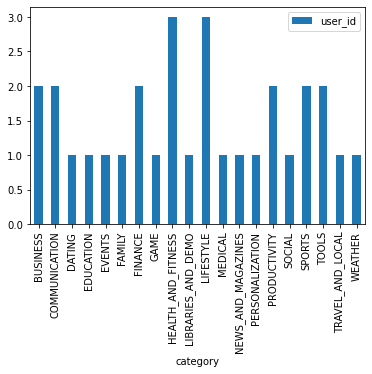

In [342]:
daterange.groupby('category').count().plot(y='user_id', kind='bar')

<AxesSubplot:xlabel='user_id'>

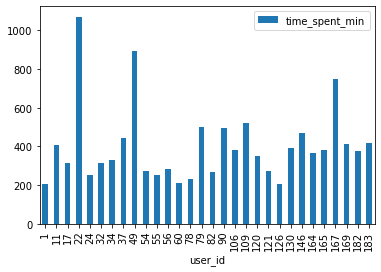

In [534]:
daterange.groupby('user_id').sum().plot(y='time_spent_min', kind='bar')

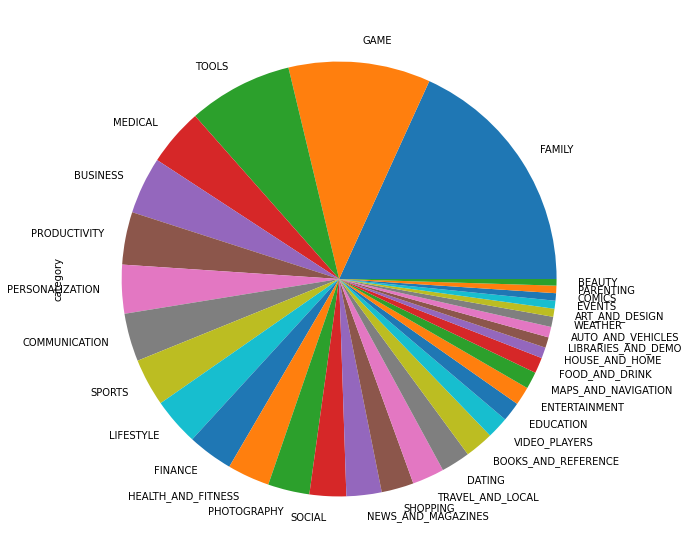

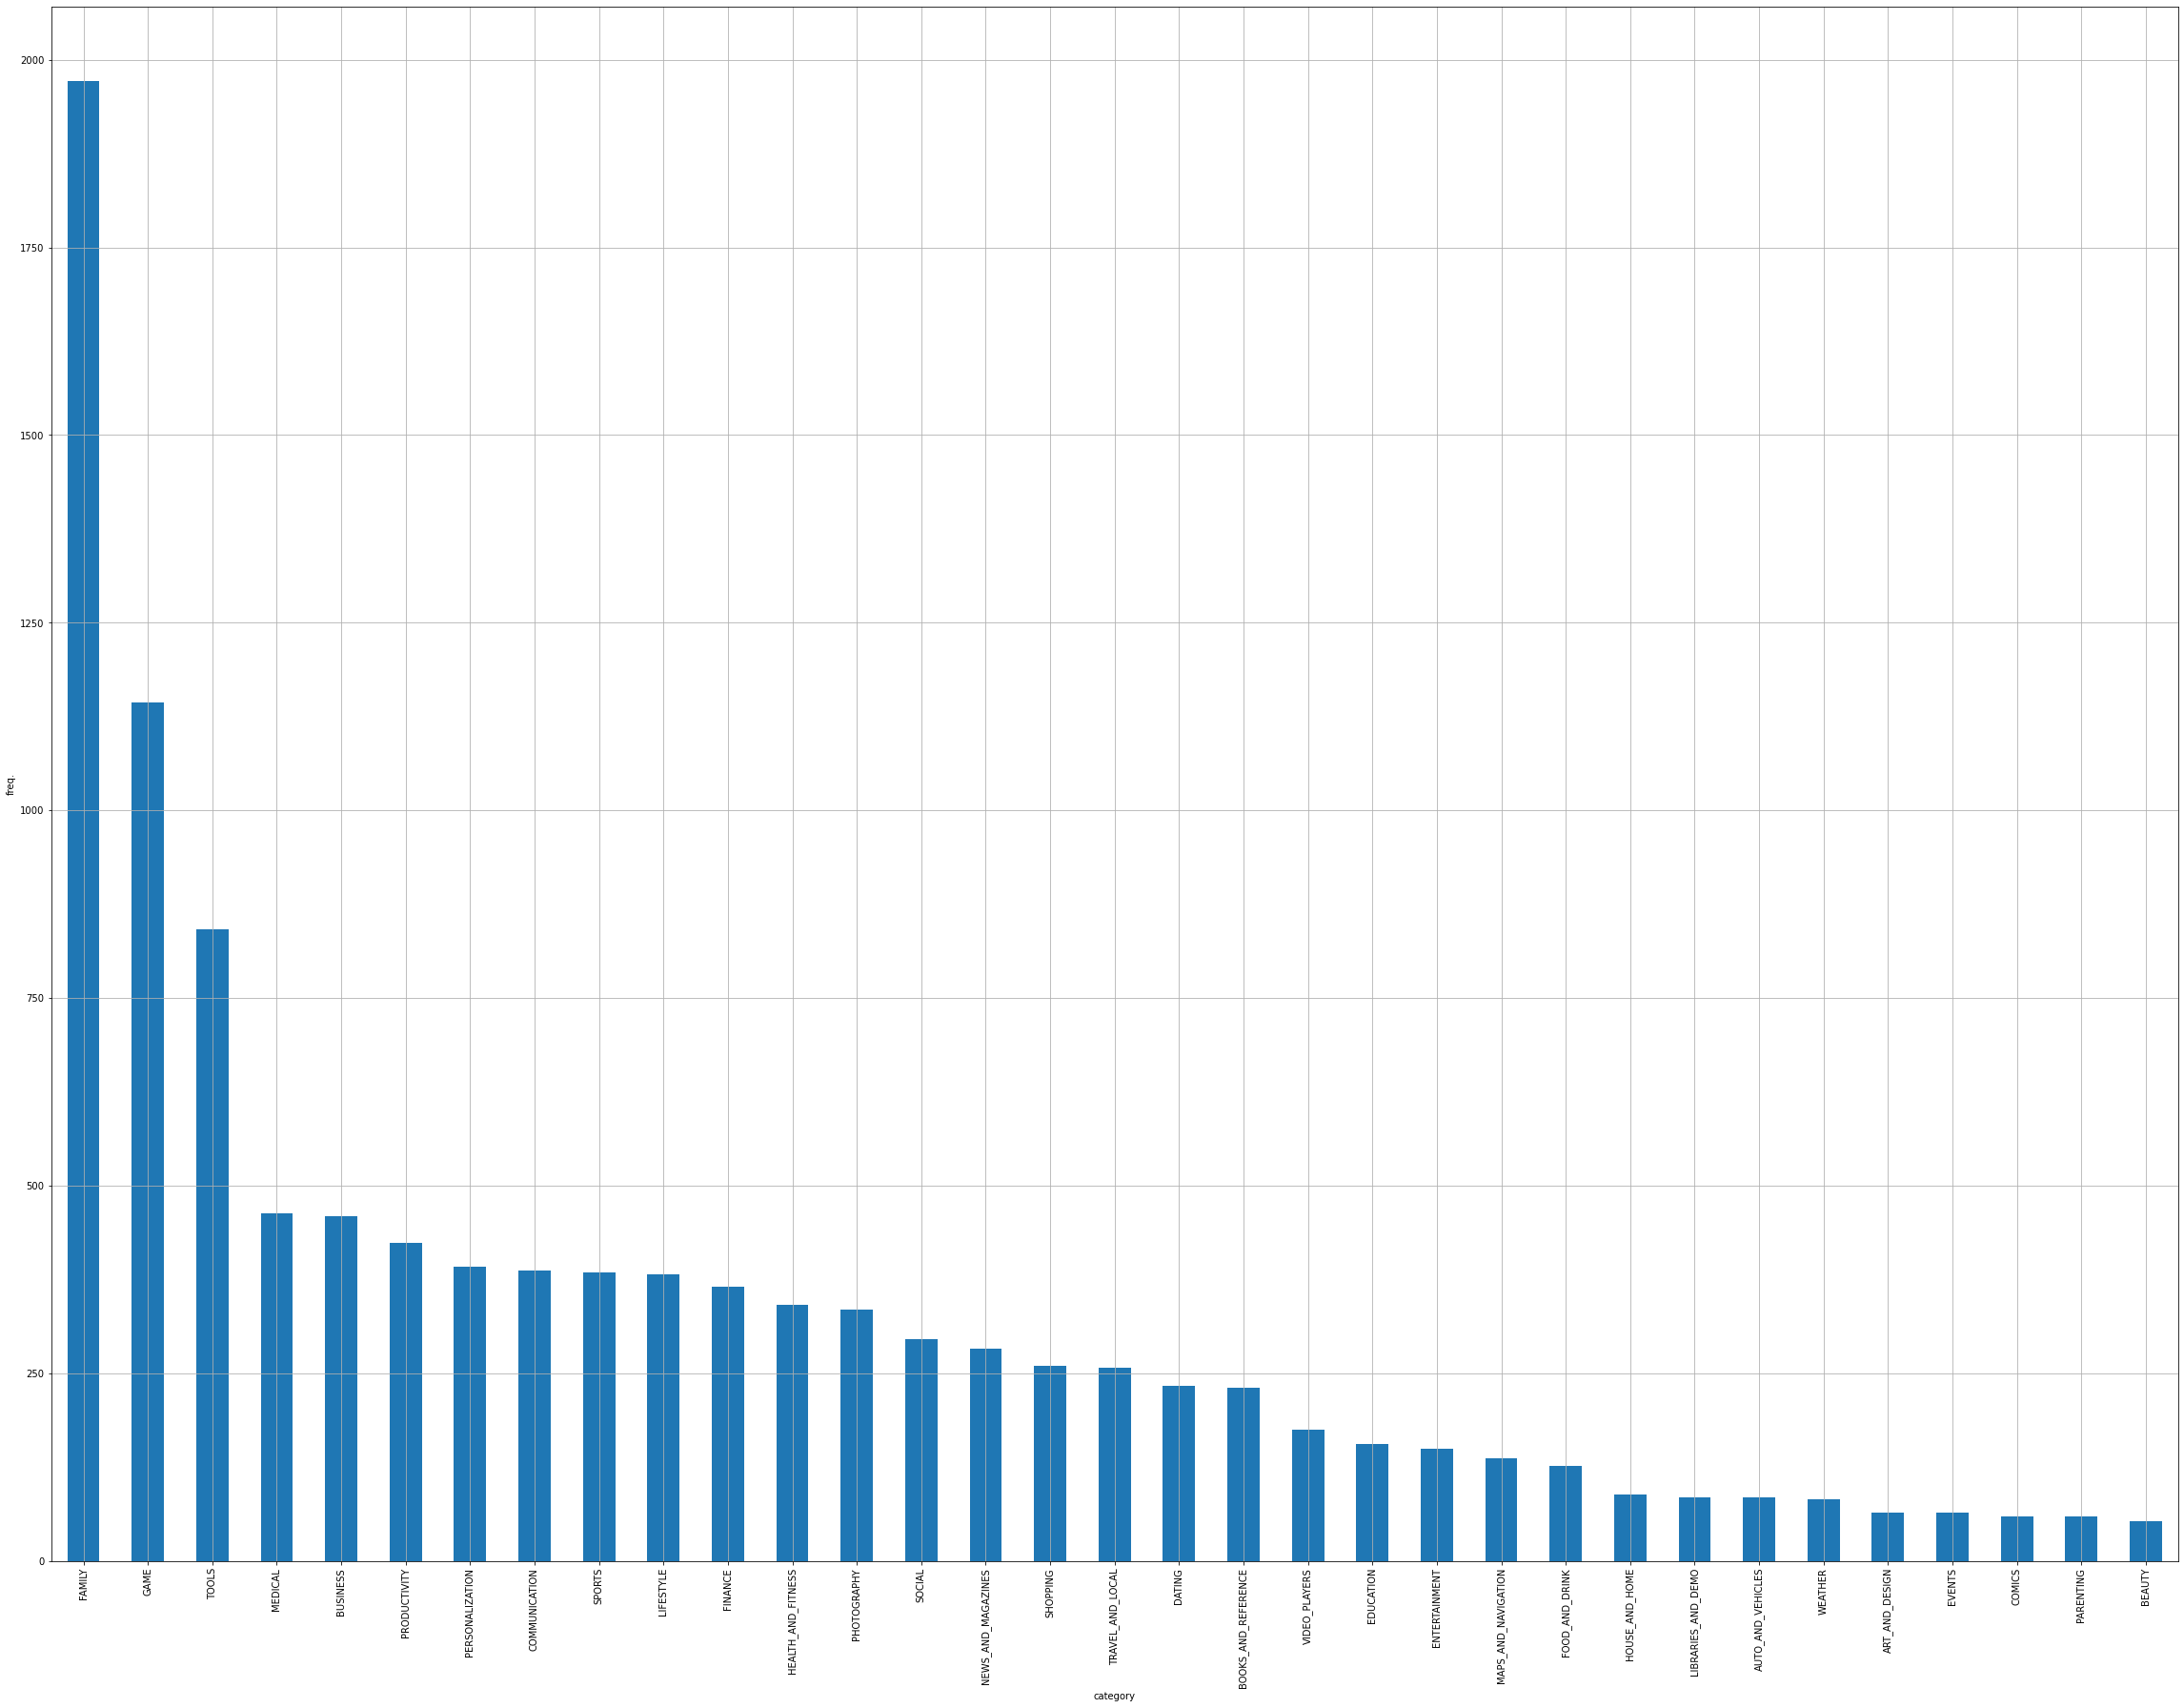

In [338]:
# most Most popular category
plt.figure(figsize=(40,10))
df['category'].value_counts().plot(kind='pie')
plt.show()
plt.figure(figsize=(40,30))
df['category'].value_counts().plot(kind='bar')
plt.xlabel('category')
plt.ylabel('freq.')
plt.grid()
plt.show()

In [137]:
df.to_csv('Android_App_Dataset.csv', index =False)

In [277]:
import json
import boto3
#json.loads take a string as input and returns a dictionary as output.
#json.dumps take a dictionary as input and returns a string as output.

In [278]:
dict_record = {"InvoiceNo": 536370, "StockCode": 22728, "Description": "ALARM CLOCK BAKELIKE PINK", "Quantity": 24, "InvoiceDate": "12/1/2010 8:45", "UnitPrice": 3.75, "CustomerID": 12583, "Country": "France"}

In [279]:
inventory_key = dict()
#create export dictionary
ex_dynamoRecord = dict()

In [280]:
inventory_key.update({'InvoiceNo': {"N": str(dict_record['InvoiceNo'])}})
inventory_key.update({'CustomerID': {"N": str(dict_record['CustomerID'])}})
print(inventory_key)

{'InvoiceNo': {'N': '536370'}, 'CustomerID': {'N': '12583'}}


In [281]:
stock_dict = dict(dict_record)
print(stock_dict)

{'InvoiceNo': 536370, 'StockCode': 22728, 'Description': 'ALARM CLOCK BAKELIKE PINK', 'Quantity': 24, 'InvoiceDate': '12/1/2010 8:45', 'UnitPrice': 3.75, 'CustomerID': 12583, 'Country': 'France'}


In [282]:
stock_dict.pop('InvoiceNo',None)
stock_dict.pop('StockCode',None)
stock_dict.pop('Quantity',None)
print(stock_dict)

{'Description': 'ALARM CLOCK BAKELIKE PINK', 'InvoiceDate': '12/1/2010 8:45', 'UnitPrice': 3.75, 'CustomerID': 12583, 'Country': 'France'}


In [283]:
stock_json = json.dumps(stock_dict)
print(stock_json)

{"Description": "ALARM CLOCK BAKELIKE PINK", "InvoiceDate": "12/1/2010 8:45", "UnitPrice": 3.75, "CustomerID": 12583, "Country": "France"}


In [284]:
#add the stock json to the column with the name of the stock number
ex_dynamoRecord.update({str(dict_record['StockCode']): {'Value':{"S":stock_json},"Action":"PUT"}})
ex_dynamoRecord.update({str(dict_record['Quantity']): {'Value':{"S":stock_json},"Action":"PUT"}})
print(ex_dynamoRecord)

{'22728': {'Value': {'S': '{"Description": "ALARM CLOCK BAKELIKE PINK", "InvoiceDate": "12/1/2010 8:45", "UnitPrice": 3.75, "CustomerID": 12583, "Country": "France"}'}, 'Action': 'PUT'}, '24': {'Value': {'S': '{"Description": "ALARM CLOCK BAKELIKE PINK", "InvoiceDate": "12/1/2010 8:45", "UnitPrice": 3.75, "CustomerID": 12583, "Country": "France"}'}, 'Action': 'PUT'}}


In [289]:
dictionary = daterange.set_index('user_id').T.to_dict('list')
np.save('my_file.npy', dictionary) 

<ipython-input-289-46f8a3d2696e>:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  daterange.set_index('user_id').T.to_dict('list')


{122: [Timestamp('2020-12-01 00:00:00'),
  'Be Fabulous PHOTO BOOTH',
  'PHOTOGRAPHY',
  4.1,
  560,
  1700000.0,
  10000,
  'Free',
  0.0,
  'Everyone',
  'Photography',
  Timestamp('2017-02-01 00:00:00'),
  '1.07',
  '4.0 and up',
  1980,
  'Courtney Olson, 38, Massachusetts, 341'],
 182: [Timestamp('2020-11-12 00:00:00'),
  'FVD Ad-Free',
  'TOOLS',
  4.4,
  1774,
  4100000.0,
  10000,
  'Paid',
  1.99,
  'Everyone',
  'Tools',
  Timestamp('2017-10-05 00:00:00'),
  '4.4.3',
  '3.0 and up',
  4820,
  'Sheila Morris DVM, 32, Colorado, 306'],
 154: [Timestamp('2020-11-28 00:00:00'),
  'BC Liquor Stores',
  'LIFESTYLE',
  3.7,
  492,
  4300000.0,
  50000,
  'Free',
  0.0,
  'Everyone',
  'Lifestyle',
  Timestamp('2015-10-05 00:00:00'),
  '3.6',
  '2.2 and up',
  1478,
  'Jesse Hurley, 61, Missouri, 142'],
 80: [Timestamp('2020-11-28 00:00:00'),
  'Food Network',
  'FAMILY',
  4.1,
  7823,
  0.0,
  500000,
  'Free',
  0.0,
  'Teen',
  'Entertainment',
  Timestamp('2018-07-27 00:00:00'),
